### Get scripts

In [0]:
!wget -q https://raw.githubusercontent.com/Mmiglio/SpeechRecognition/master/src/getData.py
!wget -q https://raw.githubusercontent.com/Mmiglio/SpeechRecognition/master/src/constants.py

### Download speech data

In [0]:
from getData import downloadSpeechData, getDataDict

In [4]:
downloadSpeechData(data_path='speechData/')

Extracting /content/speechData/train.tar.gz into /content/speechData/train
Extracting /content/speechData/test.tar.gz into /content/speechData/test


In [0]:
dataDict = getDataDict(data_path='speechData/')

In [0]:
len(dataDict['train']['files'])

51094

In [121]:
!ls speechData/train/_background_noise_

doing_the_dishes.wav  exercise_bike.wav  README.md	  white_noise.wav
dude_miaowing.wav     pink_noise.wav	 running_tap.wav


## Explore data

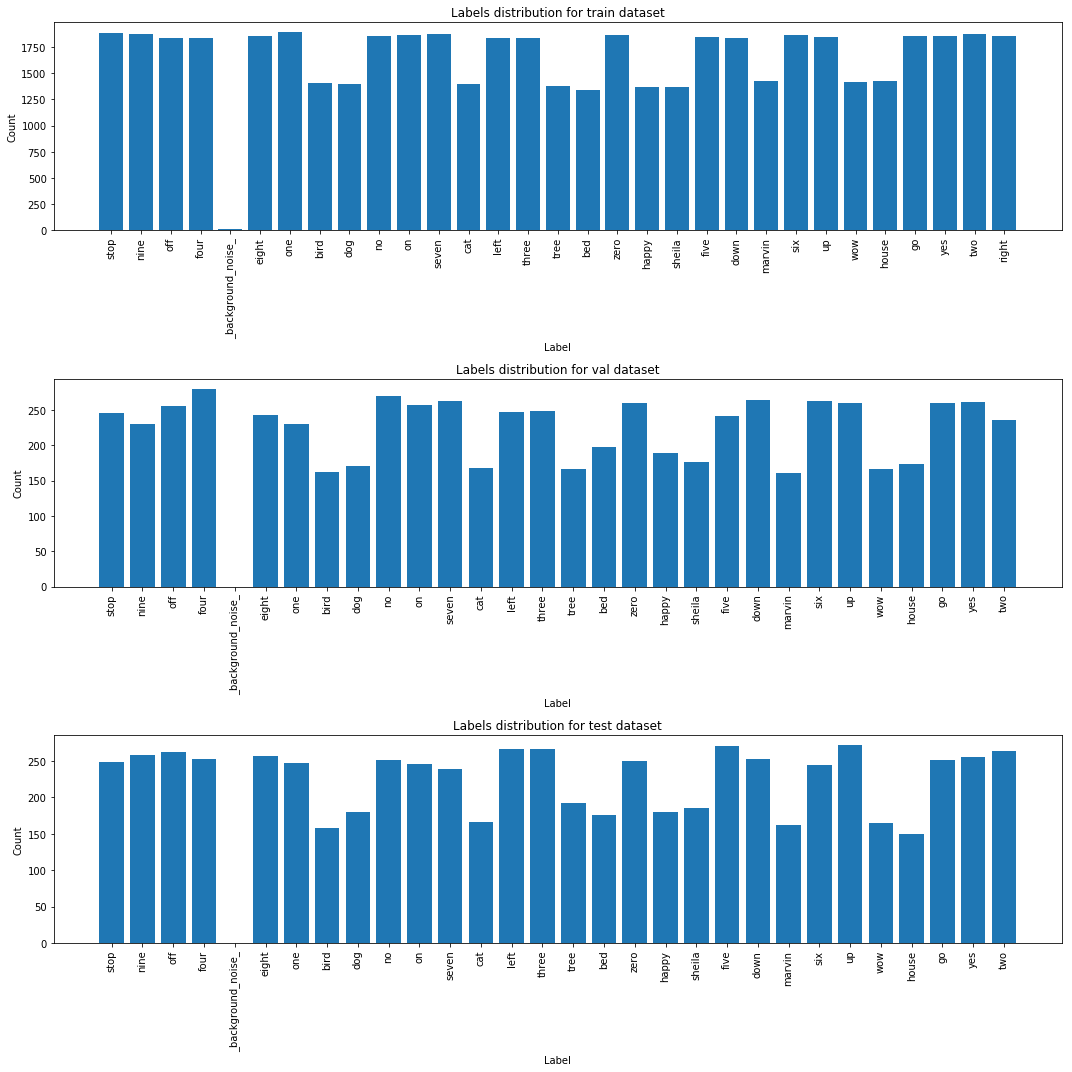

In [74]:
from collections import Counter
import matplotlib.pyplot as plt
from constants import categories, inv_categories

def valueCount(dataset):
    value_count = Counter(dataDict[dataset]['labels'])
    counts = [value_count[i] for i in range(len(value_count))] 
    labels = [inv_categories[i] for i in range(len(value_count))]
    return counts, labels
    

datasets = ['train', 'val', 'test']


fix, ax = plt.subplots(3,1, figsize=(15,15))
for i, dataset in enumerate(datasets):
    counts, values = valueCount(dataset)
    ax[i].bar(range(len(counts)), counts)
    ax[i].set_xticks(range(len(counts)))
    ax[i].set_xticklabels(labels, rotation=90)
    ax[i].set_xlabel('Label')
    ax[i].set_ylabel('Count')
    ax[i].set_title('Labels distribution for {} dataset'.format(dataset))

plt.tight_layout()
plt.show()

### Read wav files


In [105]:
from scipy.io import wavfile

f = dataDict['train']['files'][5]
sampling_rate, wave = wavfile.read(f)
print(sampling_rate)

16000


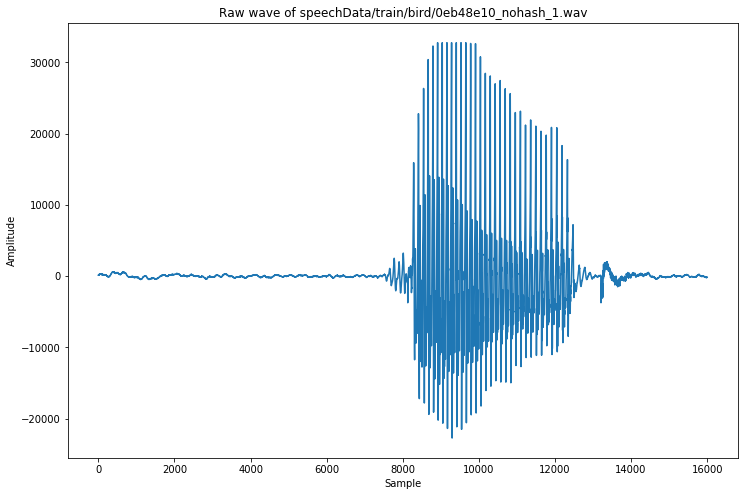

In [106]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(len(wave)), wave)
ax.set_title('Raw wave of ' + f)
ax.set_ylabel('Amplitude')
ax.set_xlabel('Sample')
fig.show()

### length of waves

In [131]:
lengths = list()
anomalies = []
for i, f in enumerate(dataDict['train']['files']):
    sampling_rate, wave = wavfile.read(f)#librosa.load(f, sr=None)
    lengths.append(len(wave))
    if len(wave)>16000:
        anomalies.append(i)

/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [133]:
Counter(lengths)

Counter({5945: 1,
         6688: 4,
         6827: 3,
         7339: 2,
         7431: 11,
         7510: 3,
         7851: 1,
         8022: 3,
         8174: 17,
         8192: 30,
         8363: 1,
         8534: 1,
         8875: 39,
         8917: 35,
         9046: 4,
         9387: 4,
         9558: 62,
         9660: 57,
         9728: 1,
         9899: 3,
         10032: 1,
         10070: 1,
         10240: 91,
         10403: 78,
         10411: 1,
         10582: 1,
         10752: 2,
         10923: 143,
         11094: 1,
         11146: 141,
         11264: 4,
         11435: 1,
         11520: 1,
         11606: 204,
         11776: 4,
         11889: 187,
         11947: 5,
         12118: 5,
         12261: 3,
         12288: 223,
         12459: 2,
         12480: 1,
         12630: 4,
         12632: 216,
         12800: 5,
         12971: 332,
         13004: 1,
         13142: 6,
         13312: 5,
         13375: 273,
         13483: 2,
         13654: 368,
     

In [128]:
print(anomalies)

[12422, 25429, 42103, 42950, 47764, 49433]


/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


1522930
16000


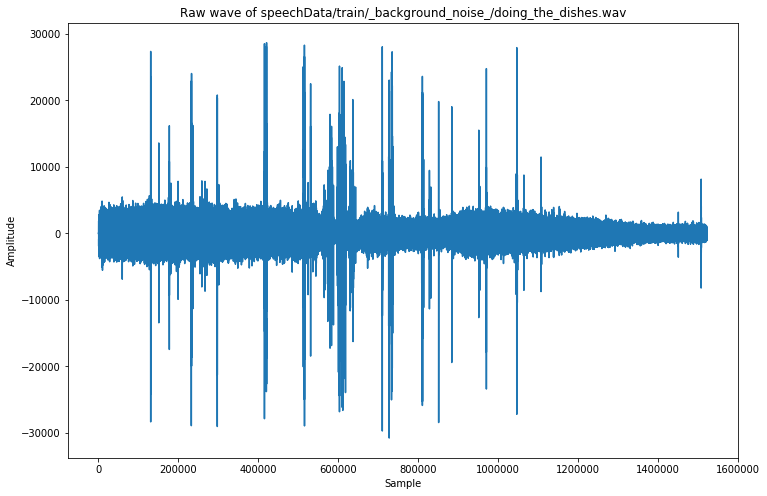

In [134]:
f = dataDict['train']['files'][anomalies[0]]
sampling_rate, wave = wavfile.read(f)
print(len(wave))
print(sampling_rate)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(len(wave)), wave)
ax.set_title('Raw wave of ' + f)
ax.set_ylabel('Amplitude')
ax.set_xlabel('Sample')
fig.show()

In [0]:
# All related to background noise, we can delete them for the moment 
# We can also split them in frames containing 16k samples.

# For the shorter waves we can add random noise

Number of samples: 12971
Sampling rate: 16000
Padded wave samples: 16000


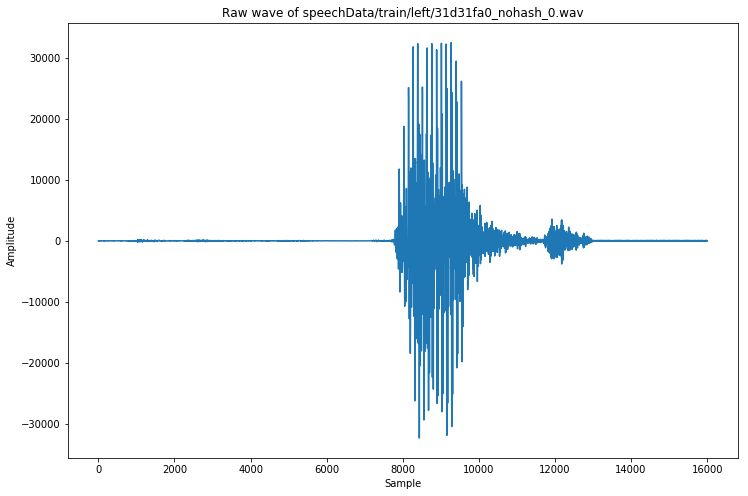

In [163]:
import numpy as np

f = dataDict['train']['files'][3]
sampling_rate, wave = wavfile.read(f)
print("Number of samples: {}".format(len(wave)))
print("Sampling rate: {}".format(sampling_rate))

if len(wave) < 16000:
    silence_part = np.random.randint(-50, 50, 16000-len(wave))
    wave = np.append(np.asarray(wave), silence_part)
    print('Padded wave samples: {}'.format(len(wave)))
    
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(len(wave)), wave)
ax.set_title('Raw wave of ' + f)
ax.set_ylabel('Amplitude')
ax.set_xlabel('Sample')
fig.show()